In [3]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
def rbg_to_chromatic_coord(img: np.ndarray) -> np.ndarray:
    sum_rgb = np.sum(img, axis=2)
    # Reshape to be able to use broadcasting
    sum_rgb = sum_rgb.reshape((*sum_rgb.shape, 1))
    # We create an empty matrix in the same img shape with floats
    result = np.zeros(img.shape)
    result = np.where(sum_rgb != 0, img / sum_rgb, 0)
    # We convert to uint8 again
    return (result * 255).astype(np.uint8)

C:\Users\andre\AppData\Local\Temp\ipykernel_29116\3642249952.py:7: RuntimeWarning: invalid value encountered in divide
  result = np.where(sum_rgb != 0, img / sum_rgb, 0)


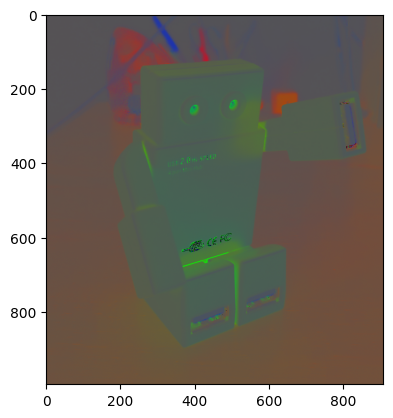

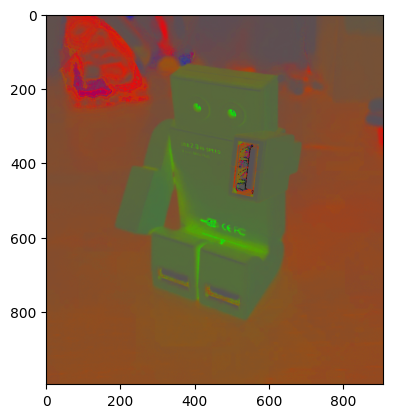

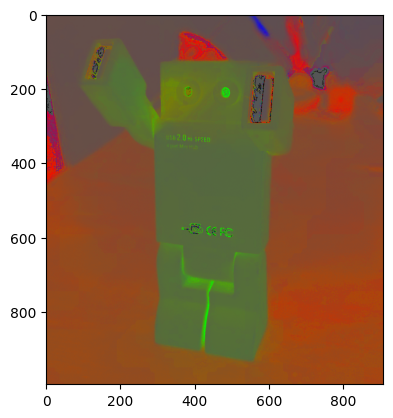

In [8]:
image_paths = ['assets\coord_cromaticas\CoordCrom_1.png','assets\coord_cromaticas\CoordCrom_2.png', 'assets\coord_cromaticas\CoordCrom_3.png']

images = [cv.imread(path) for path in image_paths]
plt.figure()

for image in images:
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    img_chromatic_coords = rbg_to_chromatic_coord(img_rgb)
    plt.imshow(img_chromatic_coords)
    plt.show()